In [52]:

import pandas as pd
import re
import seaborn as sns
import itertools
import collections
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier, export_text

In [53]:
df = pd.read_csv('BakedFoodNutritions.csv')
df

,Food,ProductType,FlavorVariant,Calories-kcl,Protein-g,Carb-g,Fiber-g,Sugar-g,Sodium-g,SaturatedFat-g,MonounsaturatedFat-g,PolyunsaturatedFat-g,TransaFat-g,MeasureQuantity,MeasureType,MQCalories-kcl,MQGmWt,MQCalories100gm-kcl
0,Andrea'S,Gluten Free Soft Dinner Roll,Prepared From Recipe,257,5.7,40.2,2.90,3.0,544,4.84,4.51,4.37,0.49,1.0,Roll,177,69.0,257
1,Archway,Home Style Cookies,Chocolate Chip Ice Box,497,4.3,65.0,2.00,34.1,270,8.10,8.90,1.40,5.83,1.0,Serving,119,24.0,497
2,Archway,Home Style Cookies,Coconut Macaroon,460,3.0,61.2,5.10,45.2,200,20.10,1.60,0.80,0.49,1.0,Serving,101,22.0,460
3,Archway,Home Style Cookies,Date Filled Oatmeal,400,4.7,68.2,2.10,34.3,331,2.80,4.80,1.10,3.36,1.0,Serving,100,25.0,400
4,Archway,Home Style Cookies,Dutch Cocoa,431,4.5,69.4,2.60,35.4,384,3.60,5.90,1.20,4.24,1.0,Serving,103,24.0,431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,Waffles,Waffles,Frozen,263,2.7,43.1,1.40,1.7,505,0.80,4.50,2.40,0.01,1.0,Waffle,118,45.0,263
652,Waffles,Waffles,Frozen,312,7.2,49.3,2.40,5.0,730,1.60,4.90,2.20,0.49,1.0,Oz,88,28.0,312
653,Waffles,Waffles,Frozen,285,6.5,43.0,2.20,4.9,638,1.50,5.10,2.20,0.49,1.0,Oz,81,28.0,285
654,Waffles,Waffles,Prepared From Recipe,291,7.9,32.9,3.33,19.0,511,2.90,3.50,6.80,0.49,1.0,Oz,82,28.0,291


In [54]:
df = df.drop_duplicates()

In [55]:
# Label klasifikasi
df['health_label'] = df.apply(
    lambda row: 'sehat' if row['Calories-kcl'] < 300 and
                            row['SaturatedFat-g'] < 5 and
                            row['Sugar-g'] < 15
                else 'tidak sehat', axis=1
)
df

,Food,ProductType,FlavorVariant,Calories-kcl,Protein-g,Carb-g,Fiber-g,Sugar-g,Sodium-g,SaturatedFat-g,MonounsaturatedFat-g,PolyunsaturatedFat-g,TransaFat-g,MeasureQuantity,MeasureType,MQCalories-kcl,MQGmWt,MQCalories100gm-kcl,health_label
0,Andrea'S,Gluten Free Soft Dinner Roll,Prepared From Recipe,257,5.7,40.2,2.90,3.0,544,4.84,4.51,4.37,0.49,1.0,Roll,177,69.0,257,sehat
1,Archway,Home Style Cookies,Chocolate Chip Ice Box,497,4.3,65.0,2.00,34.1,270,8.10,8.90,1.40,5.83,1.0,Serving,119,24.0,497,tidak sehat
2,Archway,Home Style Cookies,Coconut Macaroon,460,3.0,61.2,5.10,45.2,200,20.10,1.60,0.80,0.49,1.0,Serving,101,22.0,460,tidak sehat
3,Archway,Home Style Cookies,Date Filled Oatmeal,400,4.7,68.2,2.10,34.3,331,2.80,4.80,1.10,3.36,1.0,Serving,100,25.0,400,tidak sehat
4,Archway,Home Style Cookies,Dutch Cocoa,431,4.5,69.4,2.60,35.4,384,3.60,5.90,1.20,4.24,1.0,Serving,103,24.0,431,tidak sehat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,Waffles,Waffles,Frozen,263,2.7,43.1,1.40,1.7,505,0.80,4.50,2.40,0.01,1.0,Waffle,118,45.0,263,sehat
652,Waffles,Waffles,Frozen,312,7.2,49.3,2.40,5.0,730,1.60,4.90,2.20,0.49,1.0,Oz,88,28.0,312,tidak sehat
653,Waffles,Waffles,Frozen,285,6.5,43.0,2.20,4.9,638,1.50,5.10,2.20,0.49,1.0,Oz,81,28.0,285,sehat
654,Waffles,Waffles,Prepared From Recipe,291,7.9,32.9,3.33,19.0,511,2.90,3.50,6.80,0.49,1.0,Oz,82,28.0,291,tidak sehat


In [56]:
df['health_label'].value_counts()

,count
health_label,
tidak sehat,532
sehat,124


/tmp/ipython-input-57-244668874.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='health_label', data=df, palette='viridis')


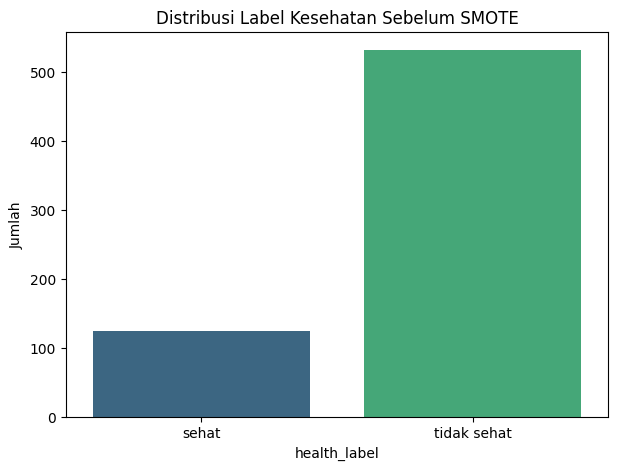

In [57]:
# Visualisasi distribusi awal
plt.figure(figsize=(7, 5))
sns.countplot(x='health_label', data=df, palette='viridis')
plt.title('Distribusi Label Kesehatan Sebelum SMOTE')
plt.xlabel('health_label')
plt.ylabel('Jumlah')
plt.show()


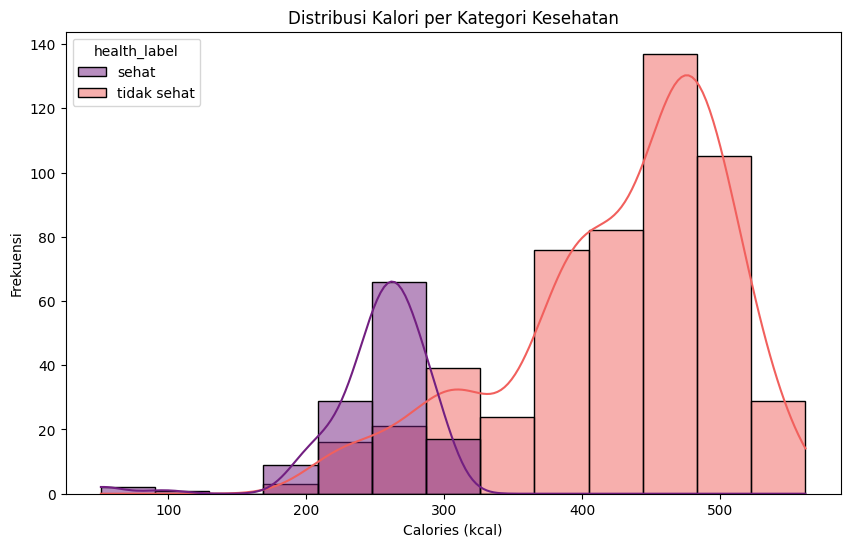

In [58]:
# Distribusi Kalori per label
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Calories-kcl', hue='health_label', kde=True, palette='magma')
plt.title('Distribusi Kalori per Kategori Kesehatan')
plt.xlabel('Calories (kcal)')
plt.ylabel('Frekuensi')
plt.show()

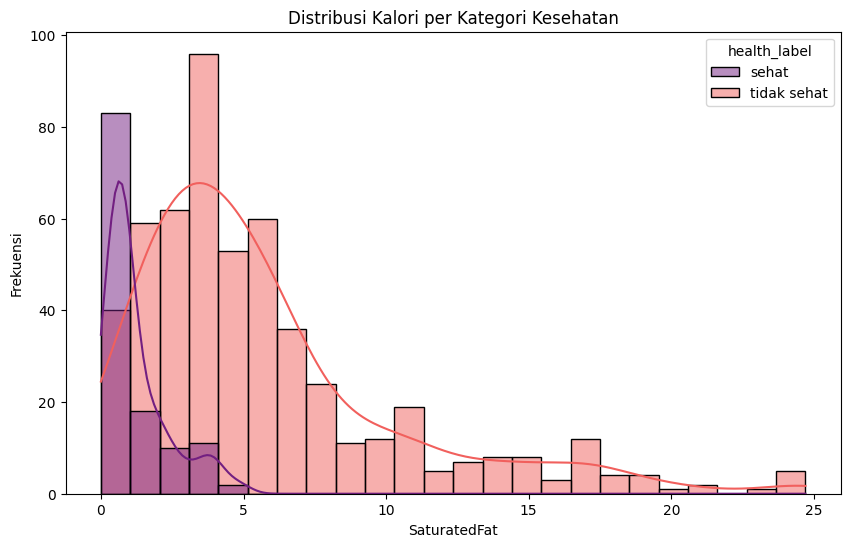

In [59]:
# Distribusi Kalori per label
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='SaturatedFat-g', hue='health_label', kde=True, palette='magma')
plt.title('Distribusi Kalori per Kategori Kesehatan')
plt.xlabel('SaturatedFat')
plt.ylabel('Frekuensi')
plt.show()

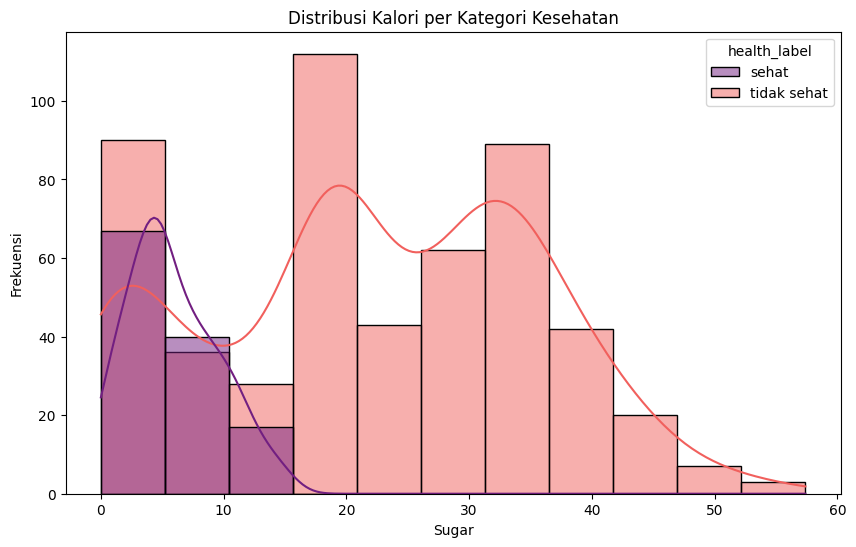

In [60]:
# Distribusi Kalori per label
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Sugar-g', hue='health_label', kde=True, palette='magma')
plt.title('Distribusi Kalori per Kategori Kesehatan')
plt.xlabel('Sugar')
plt.ylabel('Frekuensi')
plt.show()

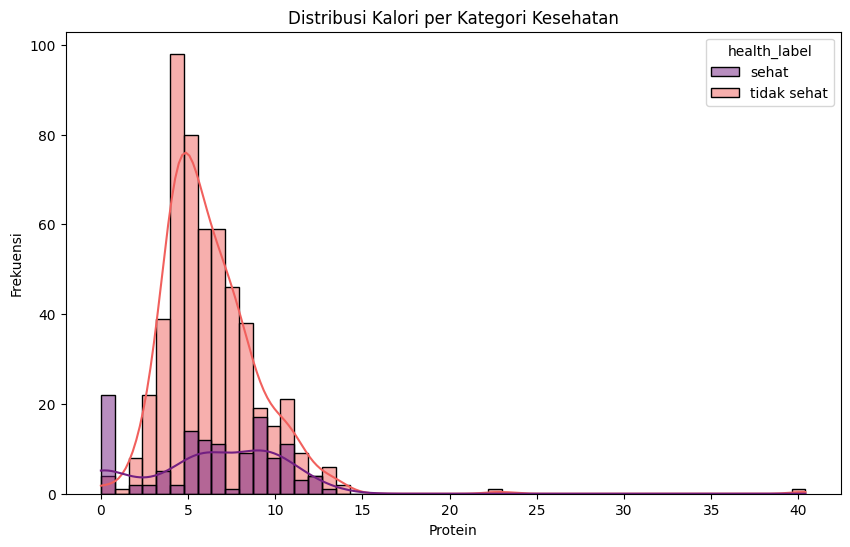

In [61]:
# Distribusi Kalori per label
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Protein-g', hue='health_label', kde=True, palette='magma')
plt.title('Distribusi Kalori per Kategori Kesehatan')
plt.xlabel('Protein')
plt.ylabel('Frekuensi')
plt.show()

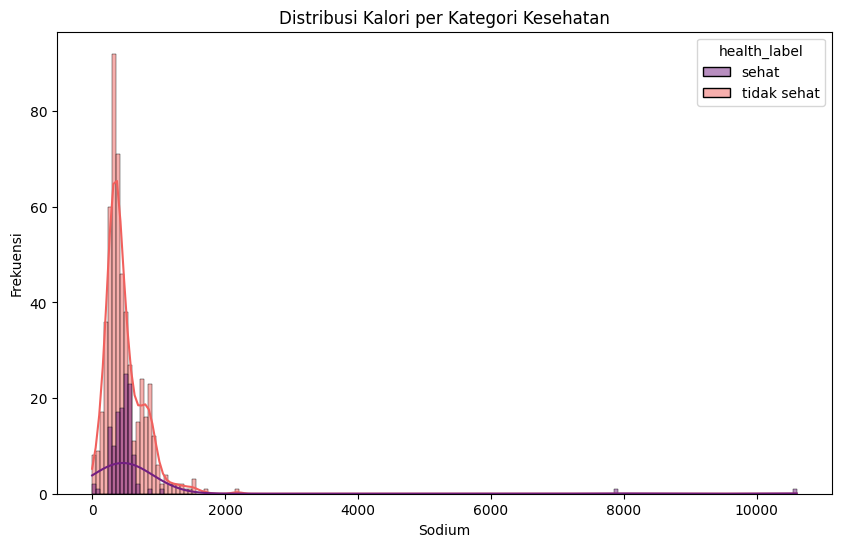

In [62]:
# Distribusi Kalori per label
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Sodium-g', hue='health_label', kde=True, palette='magma')
plt.title('Distribusi Kalori per Kategori Kesehatan')
plt.xlabel('Sodium')
plt.ylabel('Frekuensi')
plt.show()

In [63]:
features = ['Calories-kcl', 'SaturatedFat-g', 'Sugar-g', 'Protein-g', 'Sodium-g']
X = df[features]
y = df['health_label']


In [64]:
#  Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42

)



Text(0, 0.5, '')

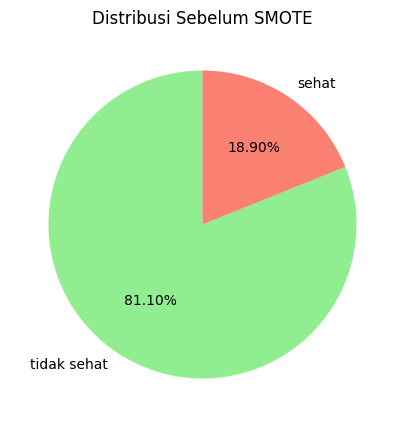

In [65]:
# Sebelum SMOTE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['health_label'].value_counts().plot.pie(
    autopct='%.2f%%',
    startangle=90,
    colors=['lightgreen', 'salmon'],
    title='Distribusi Sebelum SMOTE'
)
plt.ylabel('')

In [66]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

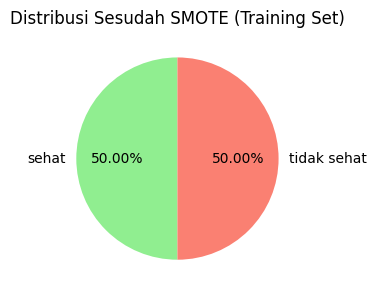

In [67]:

plt.subplot(1, 2, 2)
pd.Series(y_train_smote).value_counts().plot.pie(
    autopct='%.2f%%',
    startangle=90,
    colors=['lightgreen', 'salmon'],
    title='Distribusi Sesudah SMOTE (Training Set)'
)
plt.ylabel('')
plt.tight_layout()
plt.show()

/tmp/ipython-input-68-2885738916.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smote, palette='viridis')


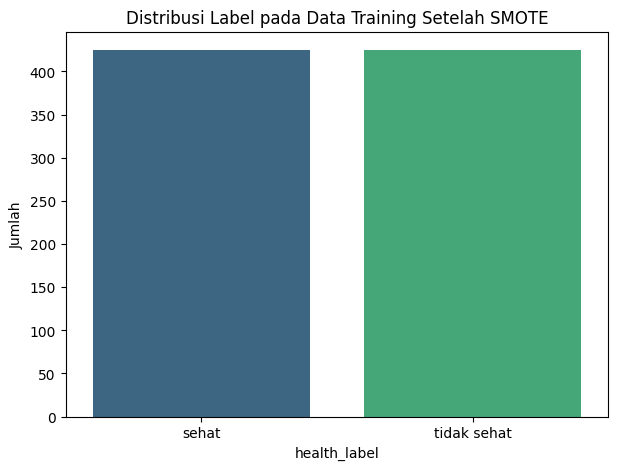

In [68]:
plt.figure(figsize=(7, 5))
sns.countplot(x=y_train_smote, palette='viridis')
plt.title('Distribusi Label pada Data Training Setelah SMOTE')
plt.xlabel('health_label')
plt.ylabel('Jumlah')
plt.show()

In [69]:
# Training model C4.5
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [70]:
# Evaluasi
print("=== Evaluasi Model ===")
prediksi = model.predict(X_test)
print("Accuracy RBF: {:.2f}%".format(accuracy_score(y_test, prediksi) * 100))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, prediksi))

=== Evaluasi Model ===
Accuracy RBF: 100.00%

Laporan Klasifikasi:
               precision    recall  f1-score   support

       sehat       1.00      1.00      1.00        25
 tidak sehat       1.00      1.00      1.00       107

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



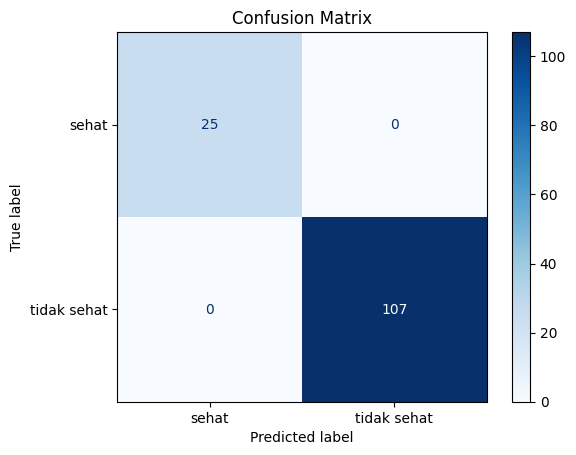

In [71]:
# Confusion matrix
cm = confusion_matrix(y_test, prediksi, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [72]:
# Aturan pohon
print("=== Aturan Pohon Keputusan (C4.5) ===")
print(export_text(model, feature_names=features))

=== Aturan Pohon Keputusan (C4.5) ===
|--- Calories-kcl <= 299.00
|   |--- Sugar-g <= 15.25
|   |   |--- class: sehat
|   |--- Sugar-g >  15.25
|   |   |--- class: tidak sehat
|--- Calories-kcl >  299.00
|   |--- class: tidak sehat



In [73]:
# Input manual
print("\n=== Input Data Baru ===")
try:
    new_input = {
        'Calories-kcl': float(input("Calories-kcl: ")),
        'SaturatedFat-g': float(input("SaturatedFat-g: ")),
        'Sugar-g': float(input("Sugar-g: ")),
        'Protein-g': float(input("Protein-g: ")),
        'Sodium-g': float(input("Sodium-g: "))
    }
    df_new = pd.DataFrame([new_input])
    prediction = model.predict(df_new)[0]
    print(f"\n✅ Hasil Prediksi: Makanan ini tergolong **{prediction.upper()}**")
except:
    print("❌ Input salah. Harap masukkan angka dengan benar.")


=== Input Data Baru ===
❌ Input salah. Harap masukkan angka dengan benar.
